In [2]:
# Install necessary packages and enable widgets extensions
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension --sys-prefix
!jupyter nbextension install --py widgetsnbextension --user
!jupyter nbextension enable --py widgetsnbextension --user
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
Installing C:\Users\35841\anaconda3\lib\site-packages\widgetsnbextension\static -> jupyter-js-widgets
Up to date: C:\Users\35841\AppData\Roaming\jupyter\nbextensions\jupyter-js-widgets\extension.js
Up to date: C:\Users\35841\AppData\Roaming\jupyter\nbextensions\jupyter-js-widgets\extension.js.map
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable widgetsnbextension --user --py
    
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


An error occurred.
ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
See the log file for details:  C:\Users\35841\AppData\Local\Temp\jupyterlab-debug-ehw2v2hs.log


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import widgets, VBox, HBox, Output
from IPython.display import display, clear_output

class BudgetPlanner:
    def __init__(self, salary):
        self.salary = salary
        self.expenses = {}
        self.total_expenses = 0

    def add_expense(self, category, amount):
        if category in self.expenses:
            self.expenses[category] += amount
        else:
            self.expenses[category] = amount
        self.total_expenses += amount

    def calculate_savings(self):
        return self.salary - self.total_expenses

    def months_to_save_for_goal(self, goal_amount):
        monthly_savings = self.calculate_savings()
        if monthly_savings > 0:
            return goal_amount / monthly_savings
        else:
            return None

    def plot_expenses(self):
        sorted_expenses = dict(sorted(self.expenses.items(), key=lambda item: item[1]))

        categories = list(sorted_expenses.keys())
        amounts = list(sorted_expenses.values())

        colors = plt.cm.tab20(range(len(categories)))

        plt.figure(figsize=(10, 5))
        plt.bar(categories, amounts, color=colors)
        plt.xlabel('Expense Categories')
        plt.ylabel('Amount Spent')
        plt.title('Monthly Expenses by Category (Sorted in Ascending Order)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def print_data(self, goal_amount, months_needed):
        output = Output()
        with output:
            clear_output()
            print(f"\nMonthly Salary: €{self.salary:.2f}")
            print("\nExpenses:")
            for category, amount in self.expenses.items():
                print(f"  {category}: €{amount:.2f}")
            print(f"\nTotal Monthly Expenses: €{self.total_expenses:.2f}")
            print(f"Monthly Savings: €{self.calculate_savings():.2f}")
            print(f"Targeted Tuition Fee: €{goal_amount:.2f}")
            if months_needed is not None:
                print(f"Duration to save the targeted amount: {months_needed:.2f} months")
            else:
                print("Your expenses exceed your income. You cannot save any money.")
        display(output)


Output()

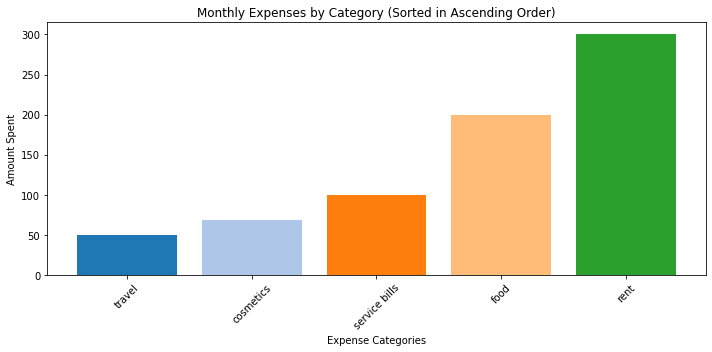

In [9]:
def main():
    salary_label = widgets.Label("Enter your monthly salary:")
    salary_widget = widgets.FloatText()

    tuition_label = widgets.Label("Enter the target tuition fees:")
    tuition_widget = widgets.FloatText()

    category_label = widgets.Label("Enter expense category:")
    category_widget = widgets.Text()

    amount_label = widgets.Label("Enter amount:")
    amount_widget = widgets.FloatText()

    add_expense_button = widgets.Button(description="Add Expense")
    finish_button = widgets.Button(description="Calculate")

    planner = BudgetPlanner(0)
    output_box = Output()

    def add_expense(_):
        category = category_widget.value
        amount = amount_widget.value
        if category and amount > 0:
            planner.add_expense(category, amount)
            with output_box:
                print(f"Added expense - {category}: €{amount:.2f}")
            category_widget.value = ''
            amount_widget.value = 0

    def finish(_):
        planner.salary = salary_widget.value
        tuition_fee = tuition_widget.value
        months_needed = planner.months_to_save_for_goal(tuition_fee)
        planner.print_data(tuition_fee, months_needed)
        planner.plot_expenses()
        with output_box:
            clear_output()

    add_expense_button.on_click(add_expense)
    finish_button.on_click(finish)

    display(VBox([
        VBox([salary_label, salary_widget]),
        VBox([tuition_label, tuition_widget]),
        HBox([VBox([category_label, category_widget]), VBox([amount_label, amount_widget])]),
        HBox([add_expense_button, finish_button]),
        output_box
    ]))

if __name__ == "__main__":
    main()
